### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [241]:
### Data Collection
import pandas_datareader as pdr
key=""

In [242]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

ValueError: ignored

In [ ]:
df.to_csv('AAPL.csv')

In [243]:
import pandas as pd

In [244]:
new_df=pd.read_csv('/content/sample_data/rest2.csv')
new_df.head()
new_df1=new_df.reset_index()['REV']

In [ ]:
new_df1

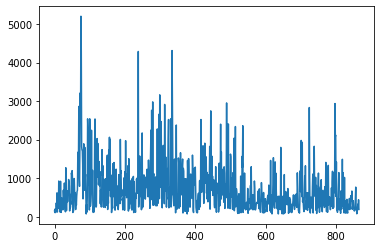

In [245]:
import matplotlib.pyplot as plt
plt.plot(new_df1)

In [246]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
new_df1=scaler.fit_transform(np.array(new_df1).reshape(-1,1))

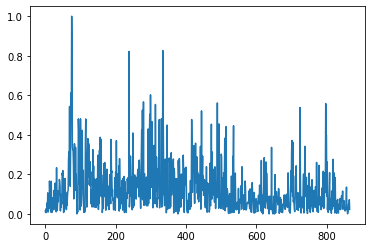

In [190]:
plt.plot(new_df1)

In [247]:
##splitting dataset into train and test split
training_size=int(len(new_df1)*0.85)
test_size=len(new_df1)-training_size
train_data,test_data=new_df1[0:training_size,:],new_df1[training_size:len(new_df1),:1]

In [192]:
training_size,test_size

(736, 130)

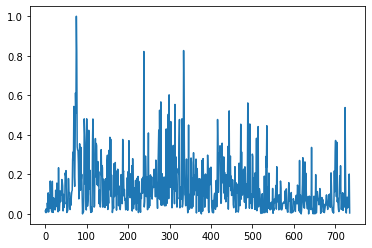

In [248]:
plt.plot(train_data)

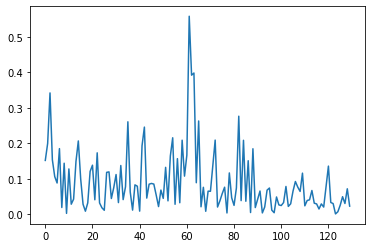

In [194]:
plt.plot(test_data)

In [249]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [281]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [205]:
X_train.shape

(635, 100)

In [ ]:
X_train[0:2,0:100]

In [197]:
print(X_train.shape), print(y_train.shape)

(635, 100)
(635,)


(None, None)

In [ ]:
training_size

In [282]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [216]:
type(X_train)

numpy.ndarray

In [217]:
X_train.shape

(635, 100, 1)

In [ ]:
X_train[0:1,0:100,:]

In [252]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [283]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [239]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_20 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_21 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_22 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [284]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
10/10 [==============================] - 5s 504ms/step - loss: 0.0203 - val_loss: 0.0013
Epoch 2/100
10/10 [==============================] - 4s 393ms/step - loss: 0.0147 - val_loss: 0.0085
Epoch 3/100
10/10 [==============================] - 4s 387ms/step - loss: 0.0146 - val_loss: 0.0051
Epoch 4/100
10/10 [==============================] - 4s 377ms/step - loss: 0.0143 - val_loss: 0.0049
Epoch 5/100
10/10 [==============================] - 4s 386ms/step - loss: 0.0142 - val_loss: 0.0042
Epoch 6/100
10/10 [==============================] - 4s 392ms/step - loss: 0.0141 - val_loss: 0.0018
Epoch 7/100
10/10 [==============================] - 4s 401ms/step - loss: 0.0140 - val_loss: 0.0035
Epoch 8/100
10/10 [==============================] - 4s 383ms/step - loss: 0.0138 - val_loss: 0.0021
Epoch 9/100
10/10 [==============================] - 4s 384ms/step - loss: 0.0139 - val_loss: 0.0023
Epoch 10/100
10/10 [==============================] - 4s 387ms/step - loss: 0.0138 - val_lo

In [286]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [287]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

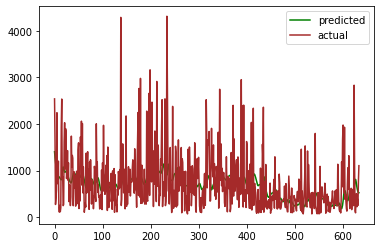

In [288]:
y_train=y_train.reshape(-1, 1) 
y_train=scaler.inverse_transform(y_train)
new_df1 = pd.DataFrame(data=train_predict[0:])
new_df2= pd.DataFrame(data=y_train)
train_frames = pd.concat([new_df1, new_df2], axis=1)
train_frames.columns = ['predicted', 'actual']
train_frames[['predicted', 'actual']].plot(color=['green', 'brown'])


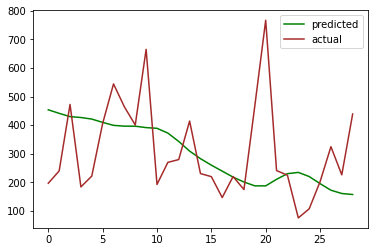

In [289]:
ytest=ytest.reshape(-1, 1) 
ytest=scaler.inverse_transform(ytest)
new_df3 = pd.DataFrame(data=test_predict[0:])
new_df4= pd.DataFrame(data=ytest)
test_frames = pd.concat([new_df3, new_df4], axis=1)
test_frames.columns = ['predicted', 'actual']
test_frames[['predicted', 'actual']].plot(color=['green', 'brown'])



In [ ]:
new_df4

In [290]:
sum(test_frames['predicted'])-sum(test_frames['actual'])

-280.2557607421877

In [295]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

180.6510440216968

In [ ]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [330]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [336]:
lst_output[:]

[[0.12534020841121674],
 [0.1249040812253952],
 [0.12447022646665573],
 [0.12403914332389832],
 [0.12361135333776474],
 [0.1231871098279953],
 [0.12276660650968552],
 [0.12234976887702942],
 [0.1219366267323494],
 [0.1215268075466156],
 [0.12112001329660416],
 [0.12071599066257477],
 [0.12031432241201401],
 [0.11991457641124725],
 [0.11951643973588943],
 [0.11911946535110474],
 [0.11872339993715286],
 [0.11832785606384277],
 [0.11793269962072372],
 [0.11753764748573303],
 [0.11714266985654831],
 [0.11674761027097702],
 [0.1163523718714714],
 [0.11595701426267624],
 [0.1155615895986557],
 [0.115166075527668],
 [0.11477049440145493],
 [0.11437498778104782],
 [0.1139795333147049],
 [0.11358420550823212]]

In [342]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
new_df1=scaler.fit_transform(np.array(new_df1).reshape(-1,1))

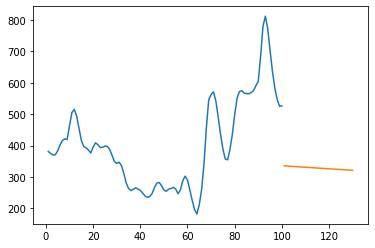

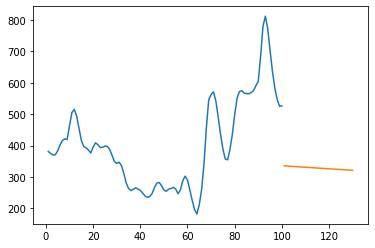

In [343]:

plt.plot(day_new,scaler.inverse_transform(new_df1[535:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

fig, ax = plt.subplots()
ax.plot(day_new,scaler.inverse_transform(new_df1[535:]))
ax.plot(day_pred,scaler.inverse_transform(lst_output))
ax.ticklabel_format(style='plain')
plt.show()

#fig, ax = plt.subplots()
#ax.plot(range(2003,2012,1),range(200300,201200,100))
#ax.ticklabel_format(useOffset=False)
#plt.show()